In [1]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

from keras.layers import Dense, Dropout, Normalization, InputLayer 
from keras.losses import MeanSquaredError, MeanAbsoluteError
from keras.metrics import RootMeanSquaredError
from keras.models import Sequential
from keras.optimizers import Adam

# Data View

In [2]:
df= pd.read_csv(r"../dataset/second_har_car_train.csv")
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [3]:
df.drop(columns=['v.id'], inplace=True, axis=1)

In [4]:
df.head()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [5]:
df.shape

(1000, 11)

In [6]:
df.describe()

,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


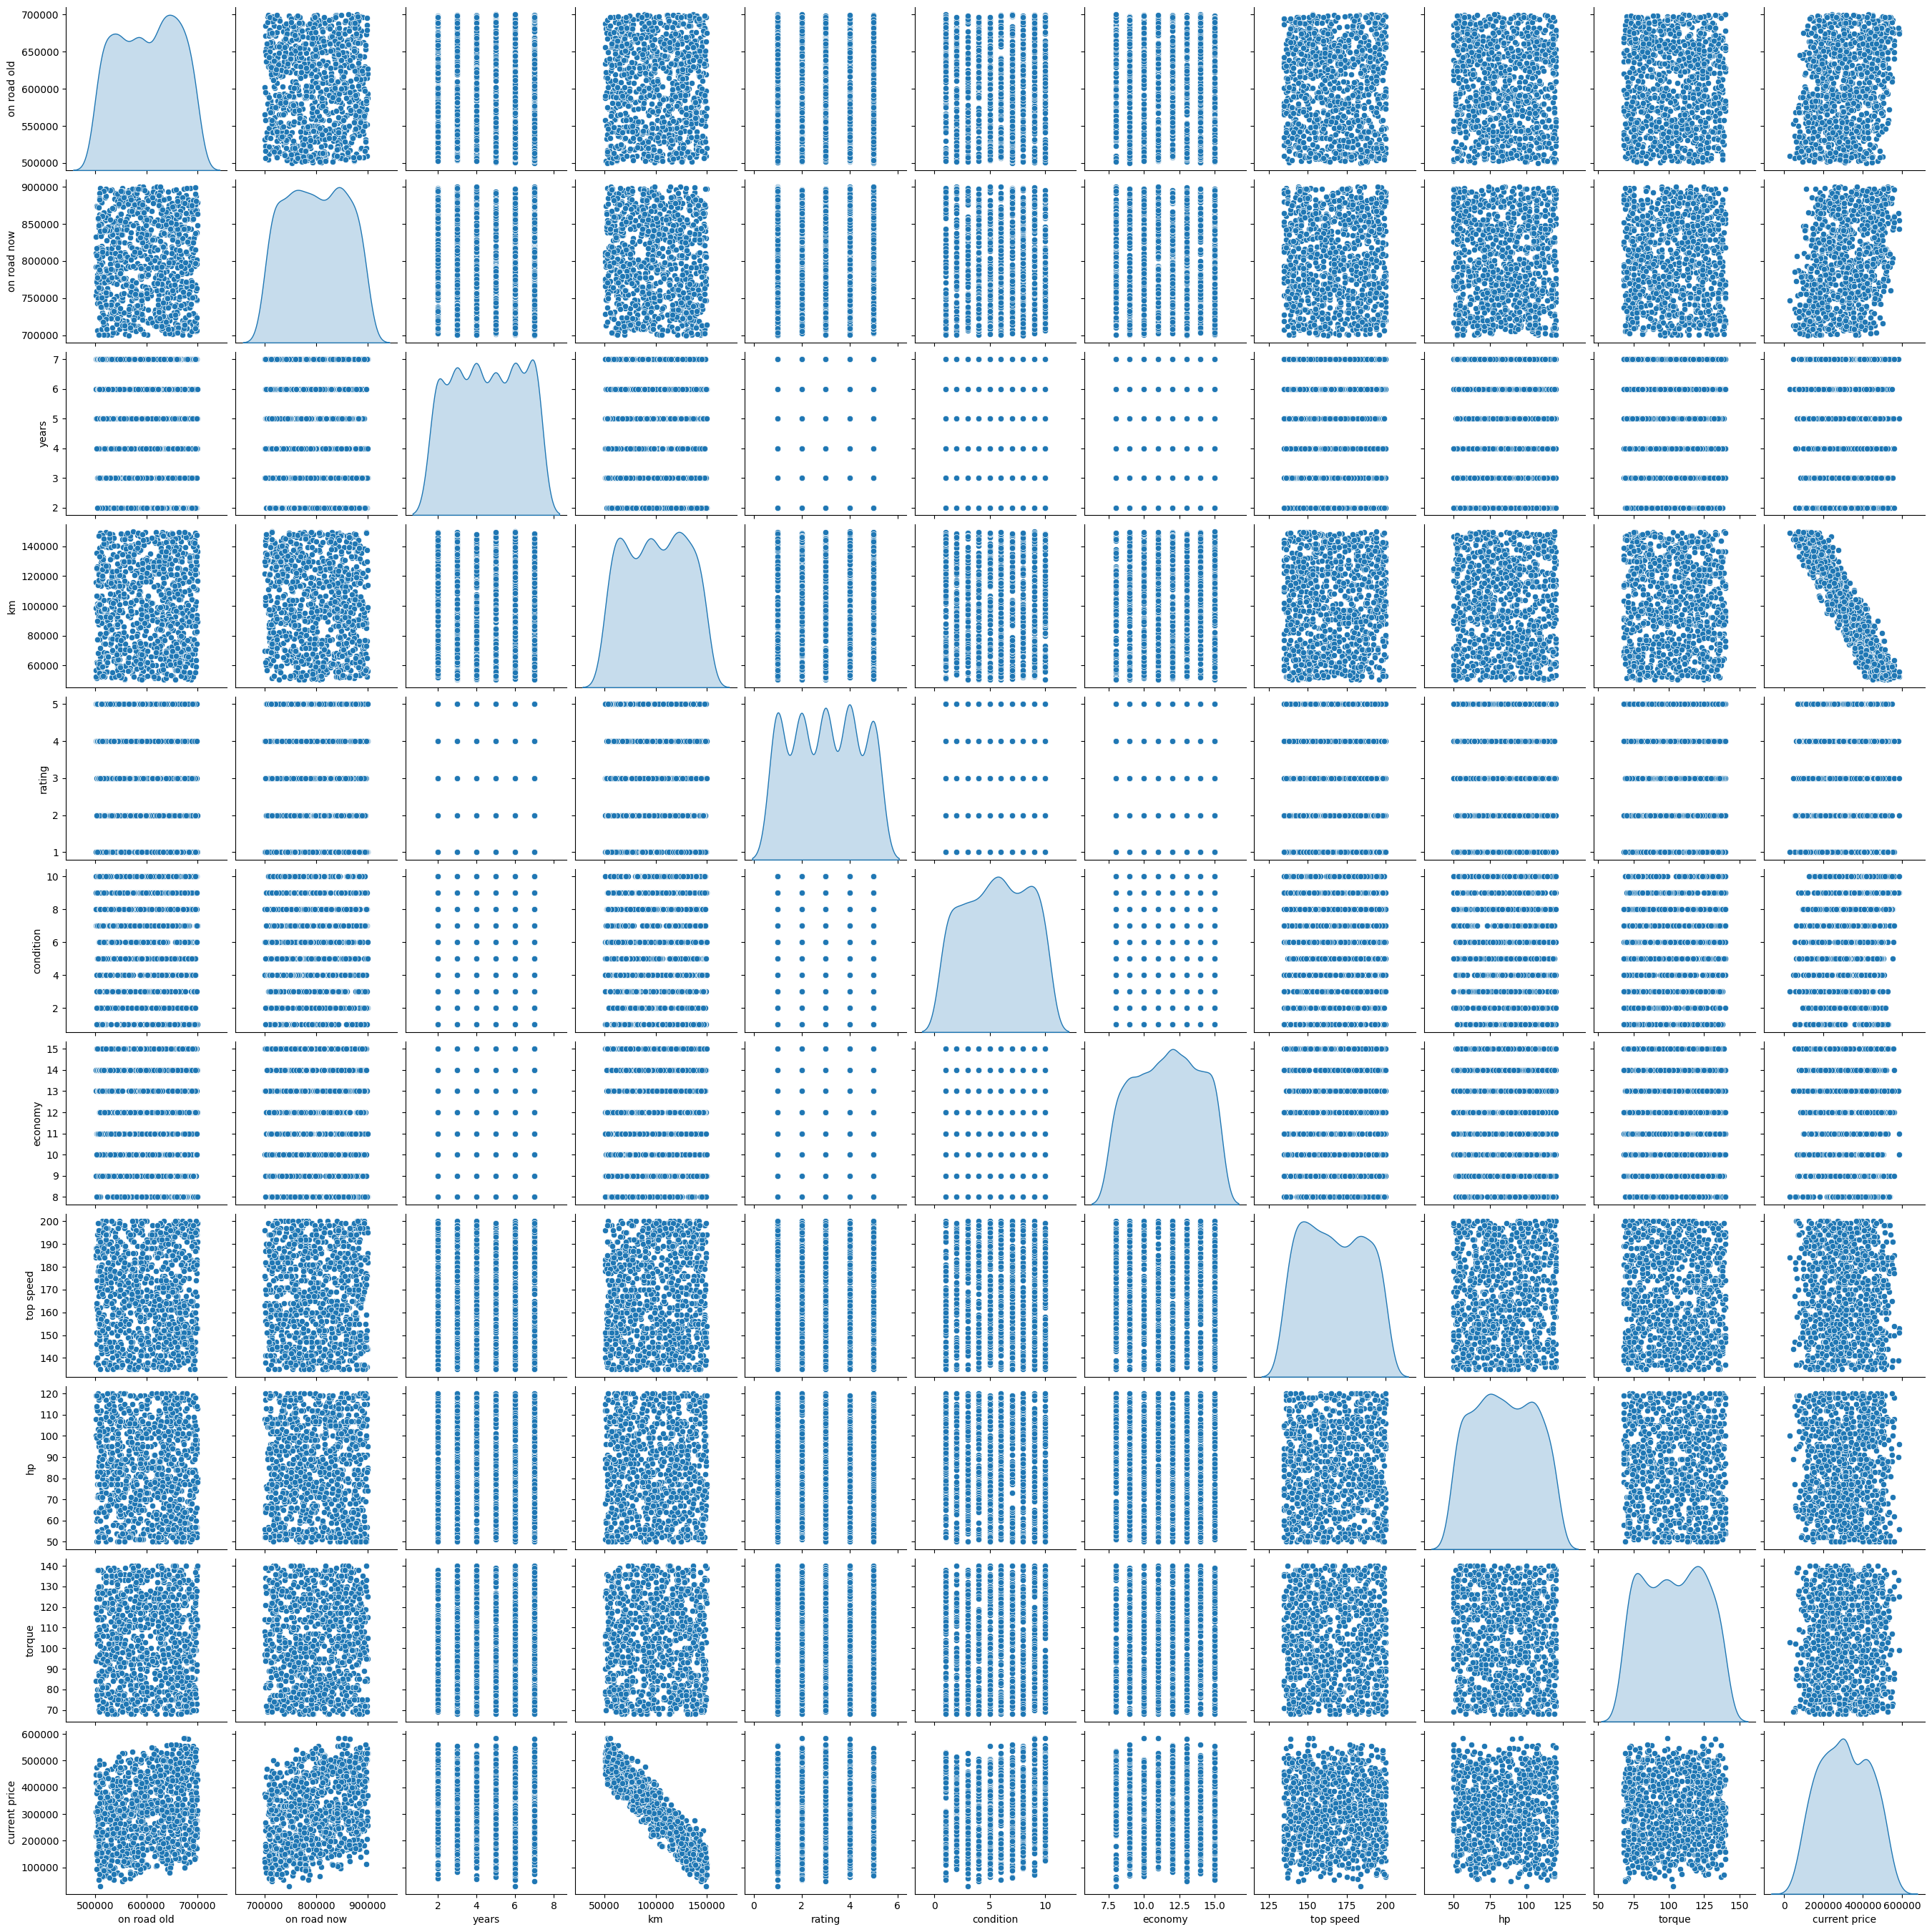

In [7]:
sns.pairplot(df, diag_kind='kde', height=2.5)

In [8]:
## convert data to tensforflow dataset
tensor_data= tf.constant(df.values, dtype=tf.float32)
print(tensor_data.shape), print(tensor_data)

(1000, 11)
tf.Tensor(
[[5.356510e+05 7.981860e+05 3.000000e+00 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [5.919110e+05 8.610560e+05 6.000000e+00 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [6.869900e+05 7.707620e+05 2.000000e+00 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [6.463440e+05 8.427330e+05 7.000000e+00 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [5.355590e+05 7.324390e+05 2.000000e+00 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [5.901050e+05 7.797430e+05 5.000000e+00 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 11), dtype=float32)


(None, None)

In [9]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:2])

tf.Tensor(
[[5.919110e+05 8.610560e+05 6.000000e+00 1.172200e+05 5.000000e+00
  9.000000e+00 9.000000e+00 1.480000e+02 7.400000e+01 9.500000e+01
  2.850015e+05]
 [6.807810e+05 8.261280e+05 7.000000e+00 7.686000e+04 2.000000e+00
  9.000000e+00 1.300000e+01 1.390000e+02 9.300000e+01 8.600000e+01
  4.673950e+05]], shape=(2, 11), dtype=float32)


In [10]:
tensor_data.shape

TensorShape([1000, 11])

In [11]:
y= tensor_data[:,-1]
X= tensor_data[:, :-1]
print(X.shape), print(y.shape)

(1000, 10)
(1000,)


(None, None)

In [12]:
y= tf.reshape(y, (-1, 1)) # convert y to 2D tensor
print(y.shape), print(y[:2])

(1000, 1)
tf.Tensor(
[[285001.5]
 [467395. ]], shape=(2, 1), dtype=float32)


(None, None)

In [13]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [14]:
DATASET_SIZE*TRAIN_RATIO

800.0

In [15]:
X_train= X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train= y[:int(DATASET_SIZE*TRAIN_RATIO)]

print(X_train.shape)
print(y_train.shape)

(800, 10)
(800, 1)


In [16]:
train_dataset= tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=8).batch(32).prefetch(tf.data.AUTOTUNE) #similar to data loader in pytorch
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [17]:
for x_,y_ in train_dataset:
  print(x_.shape, y_.shape)
  

(32, 10) (32, 1)
(32, 10) (32, 1)
(32, 10) (32, 1)
(32, 10) (32, 1)
(32, 10) (32, 1)
(32, 10) (32, 1)
(32, 10) (32, 1)
(32, 10) (32, 1)
(32, 10) (32, 1)
(32, 10) (32, 1)
(32, 10) (32, 1)
(32, 10) (32, 1)
(32, 10) (32, 1)
(32, 10) (32, 1)
(32, 10) (32, 1)
(32, 10) (32, 1)
(32, 10) (32, 1)
(32, 10) (32, 1)
(32, 10) (32, 1)
(32, 10) (32, 1)
(32, 10) (32, 1)
(32, 10) (32, 1)
(32, 10) (32, 1)
(32, 10) (32, 1)
(32, 10) (32, 1)


## validation dataset

In [18]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(100, 10)
(100, 1)


In [19]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [20]:
for x_, y_ in val_dataset:
    print(x_.shape, y_.shape)

(32, 10) (32, 1)
(32, 10) (32, 1)
(32, 10) (32, 1)
(4, 10) (4, 1)


## test dataset

In [21]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape)
print(y_test.shape)

(100, 10)
(100, 1)


In [22]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [23]:
for x_, y_ in test_dataset:
    print(x_.shape, y_.shape)

(32, 10) (32, 1)
(32, 10) (32, 1)
(32, 10) (32, 1)
(4, 10) (4, 1)


## Normalization

In [25]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X)[:5]

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[-0.15087102,  1.0730829 ,  0.8241775 ,  0.58386016,  1.4642775 ,
         1.203998  , -1.1760389 , -0.97663736, -0.5502595 , -0.39621076],
       [ 1.3741521 ,  0.46109727,  1.4030555 , -0.80353457, -0.6838068 ,
         1.203998  ,  0.62891304, -1.4423187 ,  0.3941787 , -0.82949084],
       [-0.99683243, -0.029115  , -0.3335785 , -0.47999245,  0.03222132,
         1.5531094 , -1.6272769 ,  1.3000271 ,  0.5433005 , -1.2146287 ],
       [-1.5594624 ,  0.7056602 ,  1.4030555 , -0.26359877,  0.03222132,
         0.85488653,  0.17767504,  1.2482848 , -0.10289404, -0.10735735],
       [ 0.5825026 ,  0.40050843,  1.4030555 , -0.7224084 , -1.3998349 ,
         0.85488653,  1.531389  ,  1.7139661 ,  1.5374459 , -0.63692194]],
      dtype=float32)>

# Model Creation and Training

In [26]:
X_train.shape[1]

10

In [146]:
model= Sequential([
    InputLayer(shape=(X_train.shape[1],)),
    normalizer,
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.2, seed=42),
    Dense(64, activation='relu'),
    Dense(1)
], name="second_har_car_model")
model.summary()

Model: "second_har_car_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_6 (Normalization) │ (None, 10)             │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,110 (35.59 KB)

 Trainable params: 9,089 (35.50 KB)

 Non-trainable params: 21 (88.00 B)

In [126]:
## another way of model creation  

model_new= Sequential()

model_new.add(InputLayer(shape=(X_train.shape[1],)))

model_new.add(normalizer)

model_new.add(Dense(256, activation='relu')) # Dense layer is fully connected layer
# model_new.add(Dropout(0.2, seed=42))        # Drop out layer to prevent overfitting
model_new.add(Dense(256, activation='relu'))
model_new.add(Dense(1))                     # output layer

model_new.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 10)             │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 256)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,886 (269.09 KB)

 Trainable params: 68,865 (269.00 KB)

 Non-trainable params: 21 (88.00 B)

## Compile the model

In [127]:
model_new.compile(optimizer=Adam(learning_rate=0.001),
              loss=MeanSquaredError(),
              metrics=[RootMeanSquaredError(), MeanAbsoluteError()])

In [128]:
history = model_new.fit(train_dataset, validation_data=val_dataset,
                     epochs = 100, 
                     verbose = 1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 110851792896.0000 - mean_absolute_error: 308581.5312 - root_mean_squared_error: 332900.4375 - val_loss: 112053862400.0000 - val_mean_absolute_error: 300110.5625 - val_root_mean_squared_error: 334744.4688
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 111647547392.0000 - mean_absolute_error: 309741.3438 - root_mean_squared_error: 334120.8125 - val_loss: 112029671424.0000 - val_mean_absolute_error: 297435.6250 - val_root_mean_squared_error: 334708.3438
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 111371116544.0000 - mean_absolute_error: 309334.6250 - root_mean_squared_error: 333712.4375 - val_loss: 111971295232.0000 - val_mean_absolute_error: 315620.9688 - val_root_mean_squared_error: 334621.1250
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 110860337152.0000 - mean_absolute_error: 308576.0625 - root_mean_squared_error: 332928.7812 - val_loss: 111853371392.0000 - val_mean_absolute_error: 28

In [129]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'root_mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_root_mean_squared_error'])

In [130]:
len(history.history['loss'])

100

<Axes: >

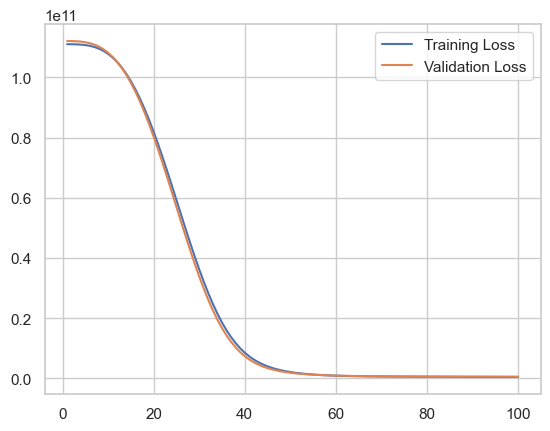

In [131]:
sns.set(style="whitegrid")
sns.lineplot(x=range(1, len(history.history['loss']) + 1), y=history.history['loss'], label='Training Loss')
sns.lineplot(x=range(1, len(history.history['val_loss']) + 1), y=history.history['val_loss'], label='Validation Loss')

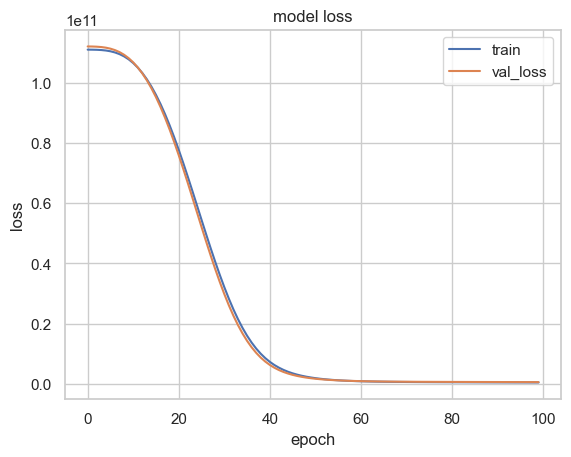

In [132]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])
plt.show()

In [133]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'root_mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_root_mean_squared_error'])

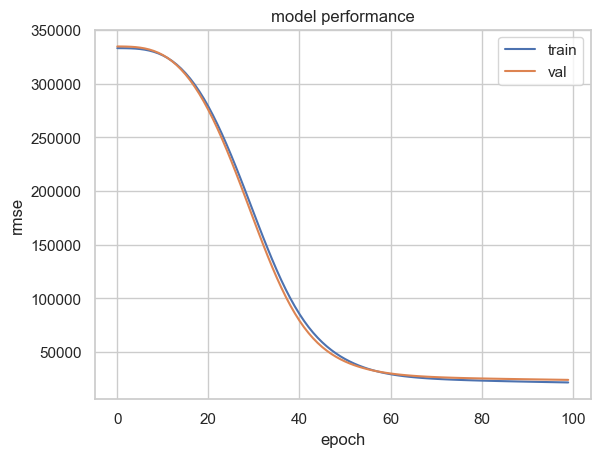

In [134]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model performance')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

## Model Evaluate and testing

In [135]:
model_new.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 421000192.0000 - mean_absolute_error: 15601.9023 - root_mean_squared_error: 20374.4336


[472893536.0, 21746.115234375, 16732.4765625]

In [136]:
X_test.shape

TensorShape([100, 10])

In [137]:
X_test[0], y_test[0]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([6.83685e+05, 7.54601e+05, 6.00000e+00, 7.05110e+04, 2.00000e+00,
        9.00000e+00, 1.50000e+01, 1.85000e+02, 1.17000e+02, 7.90000e+01],
       dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([463054.5], dtype=float32)>)

In [138]:
model_new.predict(tf.reshape(X_test[0], (1,-1)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[475553.6]], dtype=float32)

In [139]:
y_test[0] #actual value

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([463054.5], dtype=float32)>

In [140]:
y_true = list(y_test[:,0].numpy())
print(y_true)

[np.float32(463054.5), np.float32(518211.0), np.float32(479031.0), np.float32(291031.5), np.float32(393351.0), np.float32(487717.0), np.float32(433615.5), np.float32(354722.0), np.float32(356606.5), np.float32(417693.5), np.float32(316652.0), np.float32(547378.0), np.float32(413424.5), np.float32(327994.0), np.float32(421655.5), np.float32(98311.5), np.float32(299655.0), np.float32(434336.5), np.float32(278993.5), np.float32(269326.0), np.float32(555336.5), np.float32(145880.5), np.float32(428955.5), np.float32(492951.0), np.float32(206296.5), np.float32(153991.0), np.float32(221412.5), np.float32(419713.0), np.float32(413066.0), np.float32(385556.5), np.float32(122139.5), np.float32(499185.5), np.float32(213739.0), np.float32(186308.0), np.float32(262126.5), np.float32(441863.5), np.float32(382794.5), np.float32(224958.5), np.float32(228892.5), np.float32(325176.0), np.float32(460075.0), np.float32(471527.5), np.float32(164382.0), np.float32(148734.5), np.float32(172032.5), np.float32

In [141]:
y_pred = list(model_new.predict(X_test)[:,0])
print(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
[np.float32(475553.7), np.float32(515784.0), np.float32(472846.22), np.float32(279970.7), np.float32(386273.94), np.float32(490854.2), np.float32(426970.7), np.float32(359218.5), np.float32(371827.62), np.float32(441081.97), np.float32(299608.88), np.float32(594779.56), np.float32(418803.5), np.float32(323329.72), np.float32(417483.1), np.float32(89753.47), np.float32(301335.3), np.float32(422726.5), np.float32(280686.0), np.float32(236578.55), np.float32(585366.9), np.float32(152277.69), np.float32(442989.2), np.float32(498817.8), np.float32(196820.45), np.float32(146171.2), np.float32(239646.33), np.float32(422547.72), np.float32(422294.3), np.float32(386409.3), np.float32(95801.56), np.float32(512104.75), np.float32(164557.61), np.float32(165805.48), np.float32(259144.8), np.float32(425318.47), np.float32(385297.88), np.float32(229112.36), np.float32(230153.56), np.float32(281234.94), np.float32(457051.25), np.float32(488851.38), np.float32(2097

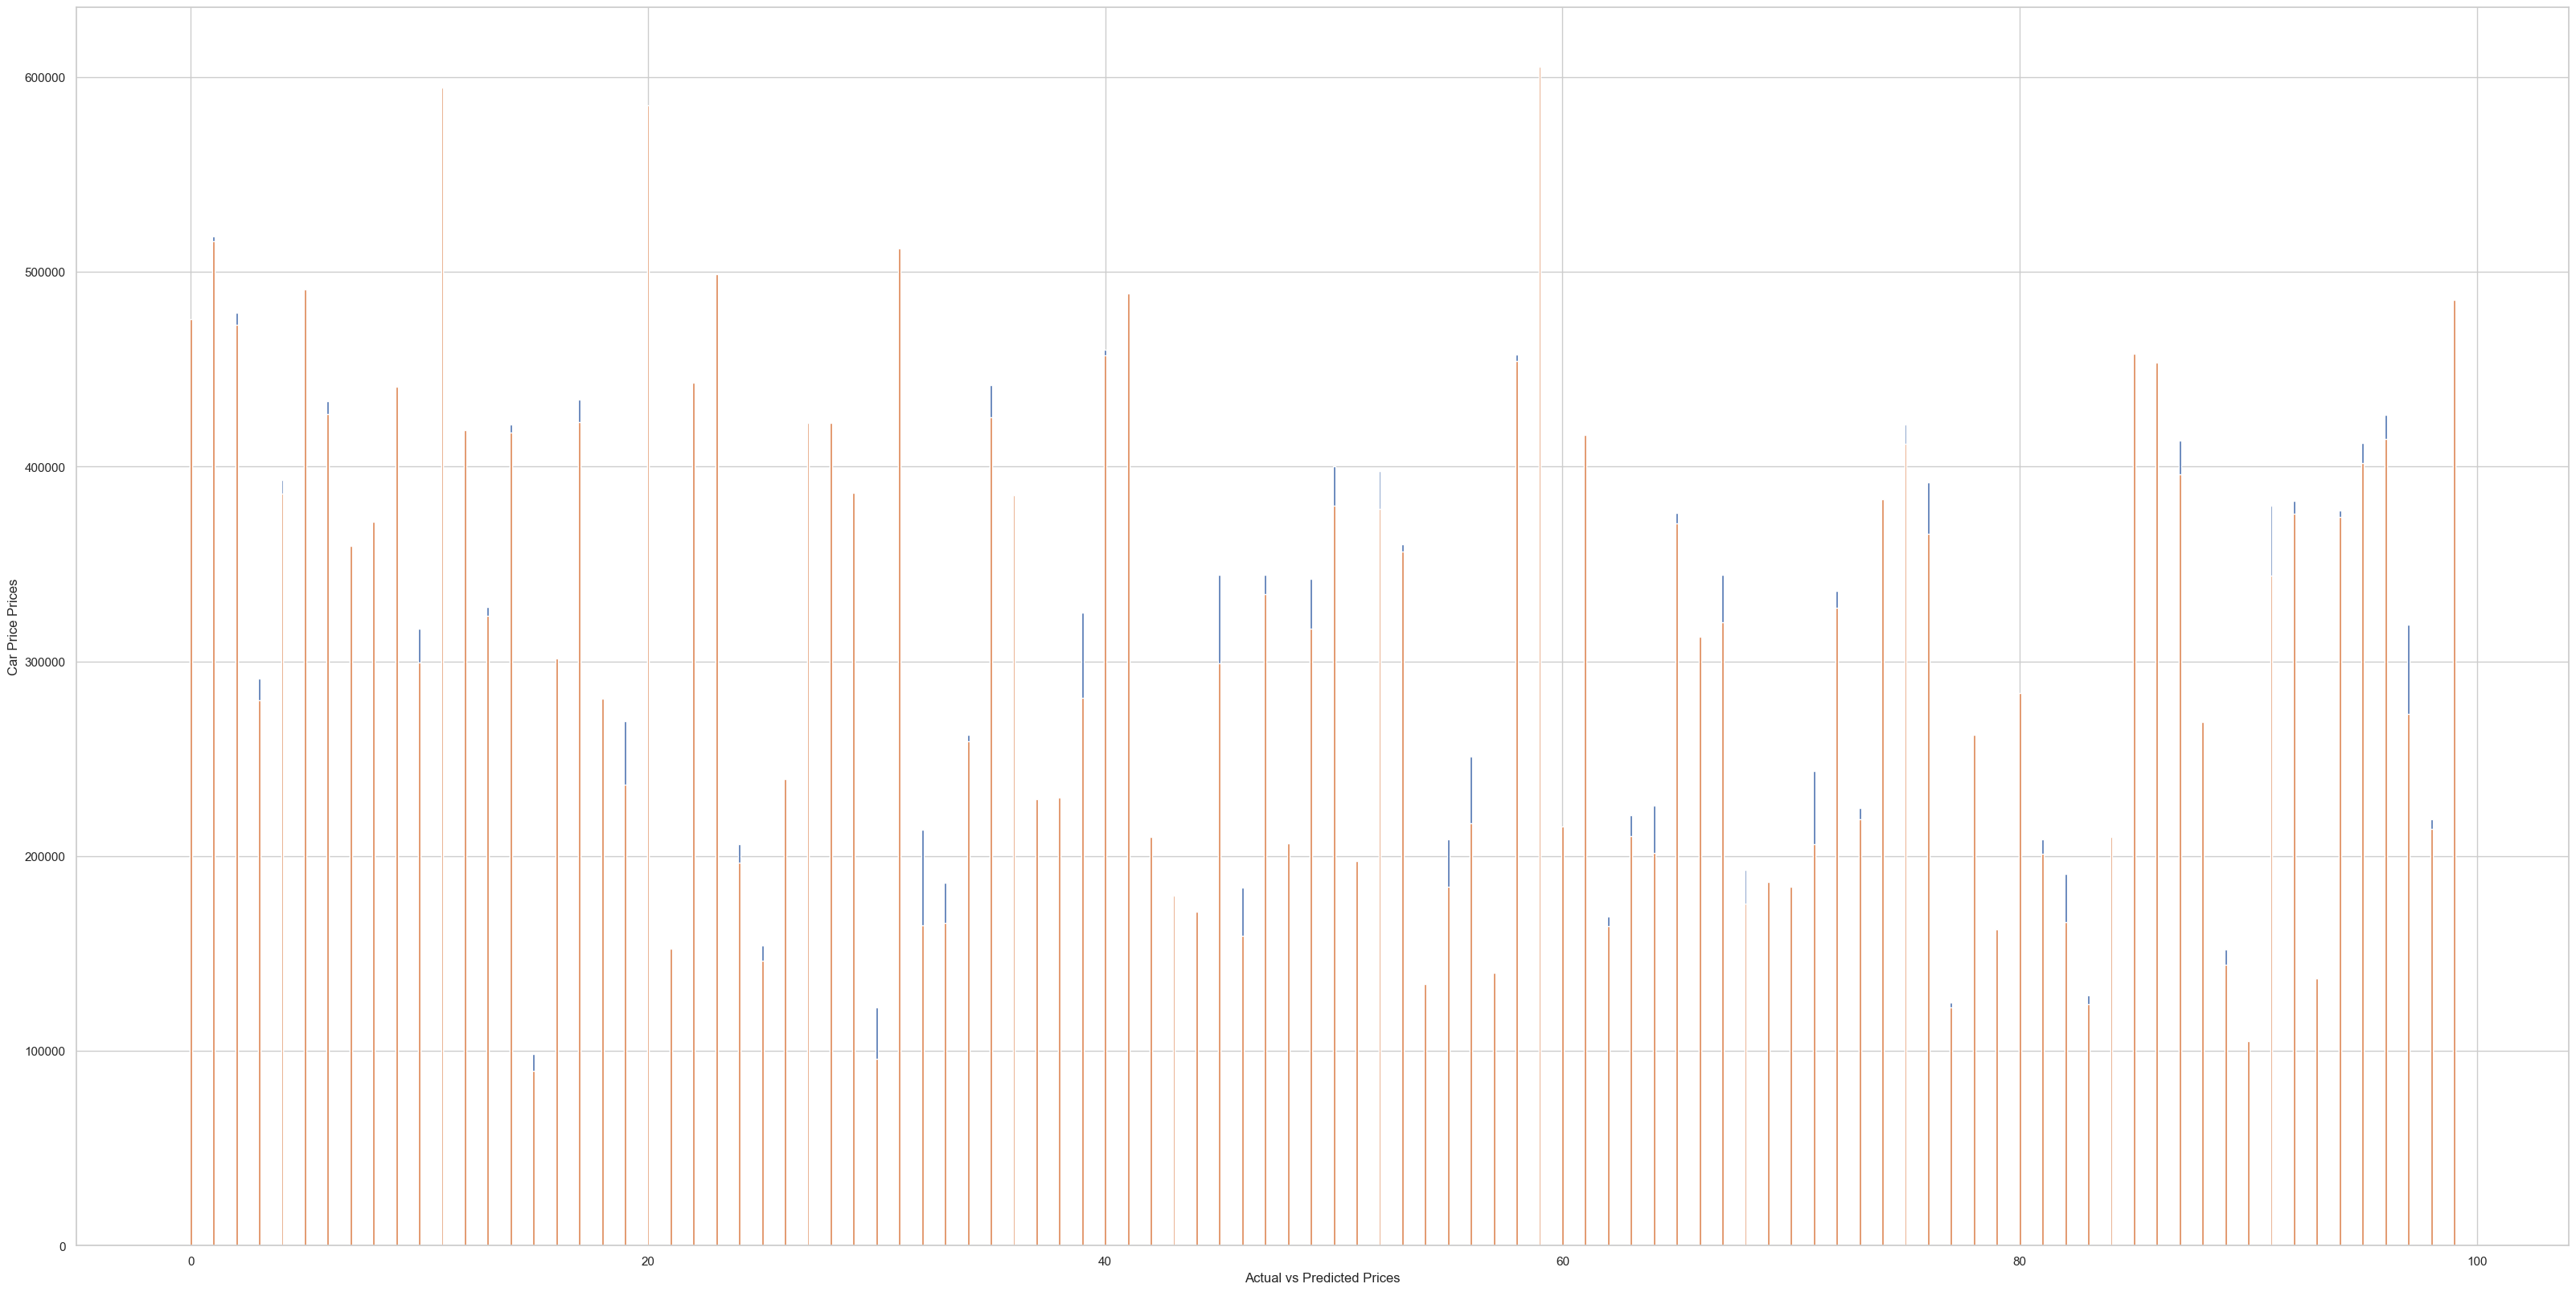

In [142]:
ind= np.arange(len(y_true))
plt.figure(figsize=(40,20))

width = 0.1
plt.bar(ind, y_true, width, label='True Value')
plt.bar(ind, y_pred, width, label='predicted Value')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()

# Plot residuals vs predicted values (for homoscedasticity check)

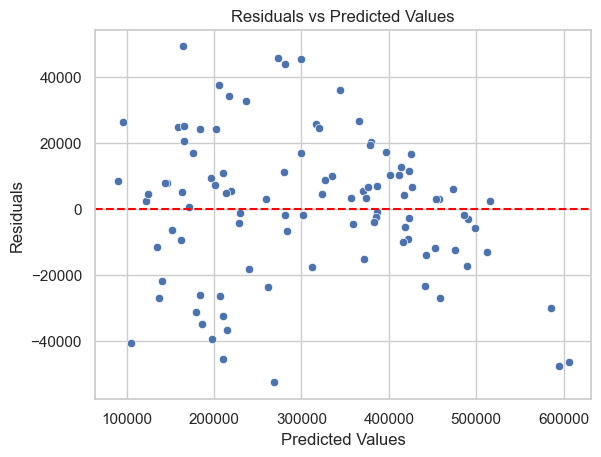

In [143]:
residuals= np.array(y_true) - np.array(y_pred)
ind= len(residuals)
sns.scatterplot(x=np.array(y_pred).flatten(), y=residuals.flatten())
plt.axhline(0, color='red', linestyle='--')  # Zero line for better visibility
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [144]:
np.array(y_true)

array([463054.5, 518211. , 479031. , 291031.5, 393351. , 487717. ,
       433615.5, 354722. , 356606.5, 417693.5, 316652. , 547378. ,
       413424.5, 327994. , 421655.5,  98311.5, 299655. , 434336.5,
       278993.5, 269326. , 555336.5, 145880.5, 428955.5, 492951. ,
       206296.5, 153991. , 221412.5, 419713. , 413066. , 385556.5,
       122139.5, 499185.5, 213739. , 186308. , 262126.5, 441863.5,
       382794.5, 224958.5, 228892.5, 325176. , 460075. , 471527.5,
       164382. , 148734.5, 172032.5, 344405.5, 183833.5, 344495. ,
       180368.5, 342427. , 400257. , 157874. , 397522. , 360008. ,
       122843.5, 208468. , 250955. , 118348.5, 457463. , 559108. ,
       178520. , 406349.5, 168854.5, 221132.5, 226087.5, 376267.5,
       295013. , 344339.5, 192853.5, 151836.5, 158031.5, 243565.5,
       336181.5, 224533.5, 379608. , 421781. , 392097.5, 124847.5,
       238638.5, 152879.5, 276805.5, 208573.5, 190956.5, 128489.5,
       177509.5, 431060. , 441395.5, 413540. , 216327. , 15212

In [145]:
# import statsmodels.api as sm
# from statsmodels.stats.diagnostic import het_breuschpagan

# # Add a constant to the model (for intercept)
# X_train_with_intercept = sm.add_constant(X_train)

# # Fit the model using statsmodels
# model_sm = sm.OLS(y_train, X_train_with_intercept).fit()

# # Perform Breusch-Pagan test
# bp_test = het_breuschpagan(model_sm.resid, model_sm.model.exog)

# # bp_test returns (Lagrange Multiplier Statistic, p-value, f-value, f p-value)
# print('Breusch-Pagan test p-value:', bp_test[1])


# Save model to local (Recommended format to store keras models is: .keras)

In [150]:
model_new.save('second_hand_car_price_regression_model.h5') 

In [151]:
## another format
model_new.save('second_hand_car_price_regression_model.keras') 

In [169]:
model_new.metrics_variables

[<Variable path=loss/total, shape=(), dtype=float32, value=47289352192.0>,
 <Variable path=loss/count, shape=(), dtype=float32, value=100.0>,
 <Variable path=root_mean_squared_error/total, shape=(), dtype=float32, value=47289352192.0>,
 <Variable path=root_mean_squared_error/count, shape=(), dtype=float32, value=100.0>,
 <Variable path=mean_metric_wrapper_4/total, shape=(), dtype=float32, value=66929.90625>,
 <Variable path=mean_metric_wrapper_4/count, shape=(), dtype=float32, value=4.0>]

In [172]:
model_new.save_weights('weights/second_hand_car_price_regression_model_weights.weights.h5')

In [ ]:
# model_new.load_weights('weights/second_hand_car_price_regression_model_weights.weights.h5')

## load the trained model

In [155]:
loaded_model= keras.models.load_model('second_hand_car_price_regression_model.keras') # load model


In [157]:
loaded_model.predict(X_test[:2]) # check if model is loaded correctly

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


array([[475553.7],
       [515784. ]], dtype=float32)

## plot the model

In [146]:
import pydot

In [148]:
tf.keras.utils.plot_model(model_new, to_file = "./model.png", show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [183]:
# dot_img_file = '/tmp/model_1.png'
# keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)